In [7]:
# Importing necassary library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [8]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

In [9]:
churnData = pd.read_csv('Data/DATA_Customer-Churn.csv')
churnData

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

     OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
0                No          Yes               No          No          No   
1               Yes           No              Yes          No          No   
2               Yes          Yes               No          No          No   
3               Yes           No              Yes         Yes          No   
4                No           No               No          No          No   
...             ...          ...              ...         ...         ...   
7038            Yes           No              Yes         Yes         Yes   
7039             No          Yes              Yes          No         Yes   
7040            Yes           No               No          No          No   
7041             No           No               No          No          No   
7042            Yes           No              Yes         Yes         Yes   

     StreamingMovies        Contract  MonthlyCharges TotalCharges Churn  
0                 No  Month-to-month           29.85        29.85    No  
1                 No        One year           56.95       1889.5    No  
2                 No  Month-to-month           53.85       108.15   Yes  
3                 No        One year           42.30      1840.75    No  
4                 No  Month-to-month           70.70       151.65   Yes  
...              ...             ...             ...          ...   ...  
7038             Yes        One year           84.80       1990.5    No  
7039             Yes        One year          103.20       7362.9    No  
7040              No  Month-to-month           29.60       346.45    No  
7041              No  Month-to-month           74.40        306.6   Yes  
7042             Yes        Two year          105.65       6844.5    No  

[7043 rows x 16 columns]

In [10]:
churnData.describe(include='all')

gender  SeniorCitizen Partner Dependents       tenure PhoneService  \
count    7043    7043.000000    7043       7043  7043.000000         7043   
unique      2            NaN       2          2          NaN            2   
top      Male            NaN      No         No          NaN          Yes   
freq     3555            NaN    3641       4933          NaN         6361   
mean      NaN       0.162147     NaN        NaN    32.371149          NaN   
std       NaN       0.368612     NaN        NaN    24.559481          NaN   
min       NaN       0.000000     NaN        NaN     0.000000          NaN   
25%       NaN       0.000000     NaN        NaN     9.000000          NaN   
50%       NaN       0.000000     NaN        NaN    29.000000          NaN   
75%       NaN       0.000000     NaN        NaN    55.000000          NaN   
max       NaN       1.000000     NaN        NaN    72.000000          NaN   

       OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
count            7043         7043             7043        7043        7043   
unique              3            3                3           3           3   
top                No           No               No          No          No   
freq             3498         3088             3095        3473        2810   
mean              NaN          NaN              NaN         NaN         NaN   
std               NaN          NaN              NaN         NaN         NaN   
min               NaN          NaN              NaN         NaN         NaN   
25%               NaN          NaN              NaN         NaN         NaN   
50%               NaN          NaN              NaN         NaN         NaN   
75%               NaN          NaN              NaN         NaN         NaN   
max               NaN          NaN              NaN         NaN         NaN   

       StreamingMovies        Contract  MonthlyCharges TotalCharges Churn  
count             7043            7043     7043.000000         7043  7043  
unique               3               3             NaN         6531     2  
top                 No  Month-to-month             NaN                 No  
freq              2785            3875             NaN           11  5174  
mean               NaN             NaN       64.761692          NaN   NaN  
std                NaN             NaN       30.090047          NaN   NaN  
min                NaN             NaN       18.250000          NaN   NaN  
25%                NaN             NaN       35.500000          NaN   NaN  
50%                NaN             NaN       70.350000          NaN   NaN  
75%                NaN             NaN       89.850000          NaN   NaN  
max                NaN             NaN      118.750000          NaN   NaN

In [11]:
churnData.TotalCharges = pd.to_numeric(churnData.TotalCharges,errors='coerce')
churnData.TotalCharges.isna().value_counts()

False    7032
True       11
Name: TotalCharges, dtype: int64

In [12]:
null_replace = np.mean(churnData['TotalCharges'])
churnData['TotalCharges'].fillna(null_replace, inplace=True)

In [13]:
X = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges','TotalCharges']]
X

tenure  SeniorCitizen  MonthlyCharges  TotalCharges
0          1              0           29.85         29.85
1         34              0           56.95       1889.50
2          2              0           53.85        108.15
3         45              0           42.30       1840.75
4          2              0           70.70        151.65
...      ...            ...             ...           ...
7038      24              0           84.80       1990.50
7039      72              0          103.20       7362.90
7040      11              0           29.60        346.45
7041       4              1           74.40        306.60
7042      66              0          105.65       6844.50

[7043 rows x 4 columns]

In [14]:

y= pd.get_dummies(churnData.Churn,drop_first=True)
y

Yes
0       0
1       0
2       1
3       0
4       1
...   ...
7038    0
7039    0
7040    0
7041    1
7042    0

[7043 rows x 1 columns]

In [15]:
print(X.shape)
print(y.shape)

(7043, 4)
(7043, 1)


In [16]:
y

Yes
0       0
1       0
2       1
3       0
4       1
...   ...
7038    0
7039    0
7040    0
7041    1
7042    0

[7043 rows x 1 columns]

## (optional)Fit a logistic Regression model on the training data.

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


log_model = LogisticRegression() 

## Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)


scaler=StandardScaler()
scaler.fit(X_train) 
X_train_mod = scaler.transform(X_train)
X_test_mod = scaler.transform(X_test)


log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Ac curacy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

## KNN_Classification

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

In [18]:
model = KNeighborsClassifier(n_neighbors=2,weights='uniform') # declare we're using knn classification model
model.fit(X_train, y_train) # train model
y_pred = model.predict(X_test) # predict test
y_pred_train=model.predict(X_train) # predict train (for sanity checks)
#model.predict_proba(inputdata)

/Users/fizzy/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [19]:
y_pred[0:5]

array([1, 0, 0, 0, 0], dtype=uint8)

In [20]:
y_test.head(5)

Yes
6625    1
5975    1
6891    0
1681    0
4780    0

# DECISION TREE CLASSIFIER

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

Error_metric     Train      Test
0     Accuracy  0.784523  0.784244
1    Precision  0.647184  0.672897
2       Recall  0.408451  0.380952

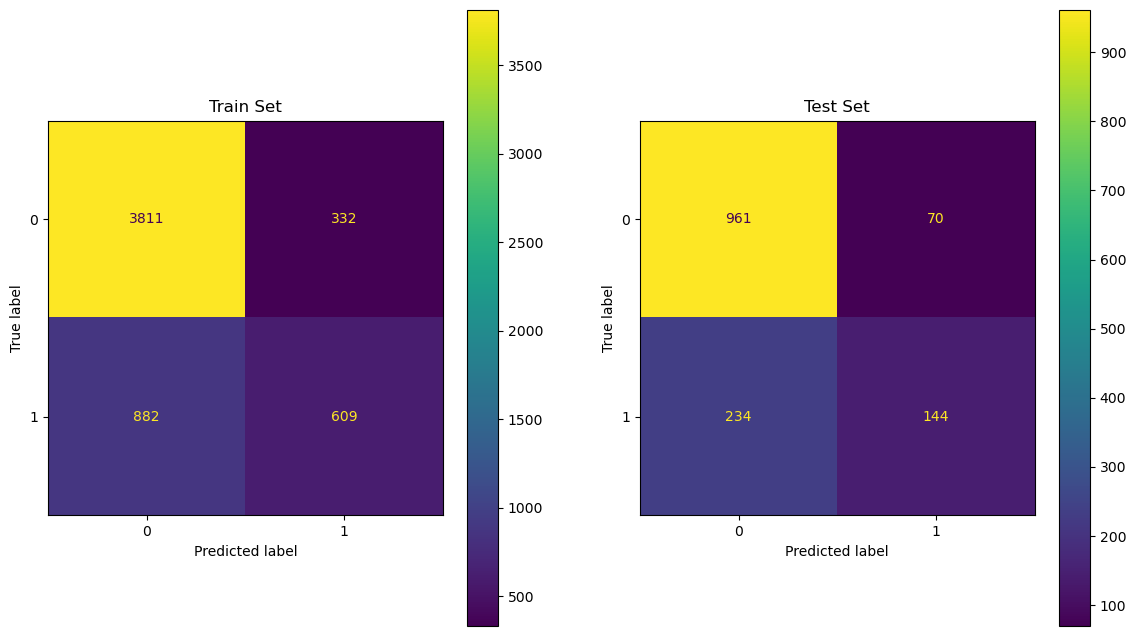

In [22]:
# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

<BarContainer object of 4 artists>

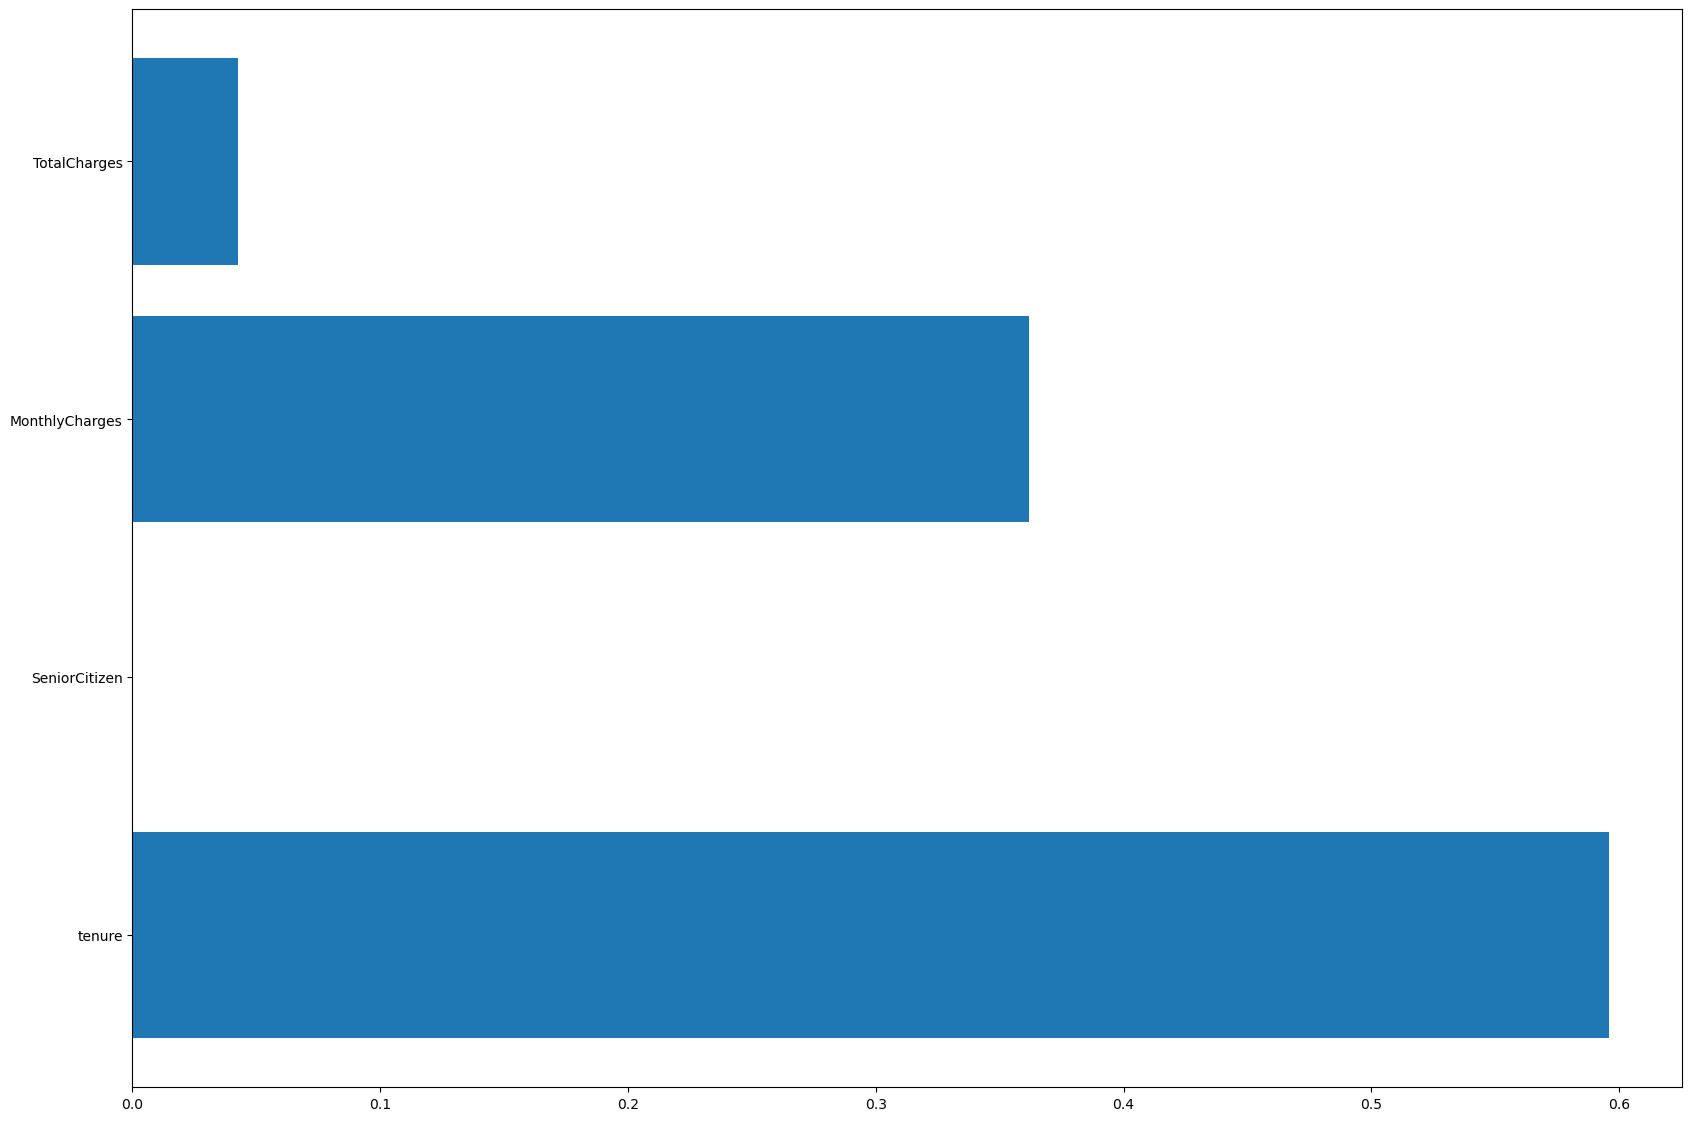

In [23]:
plt.figure(figsize=(20,14))
plt.barh(X.columns,model.feature_importances_)

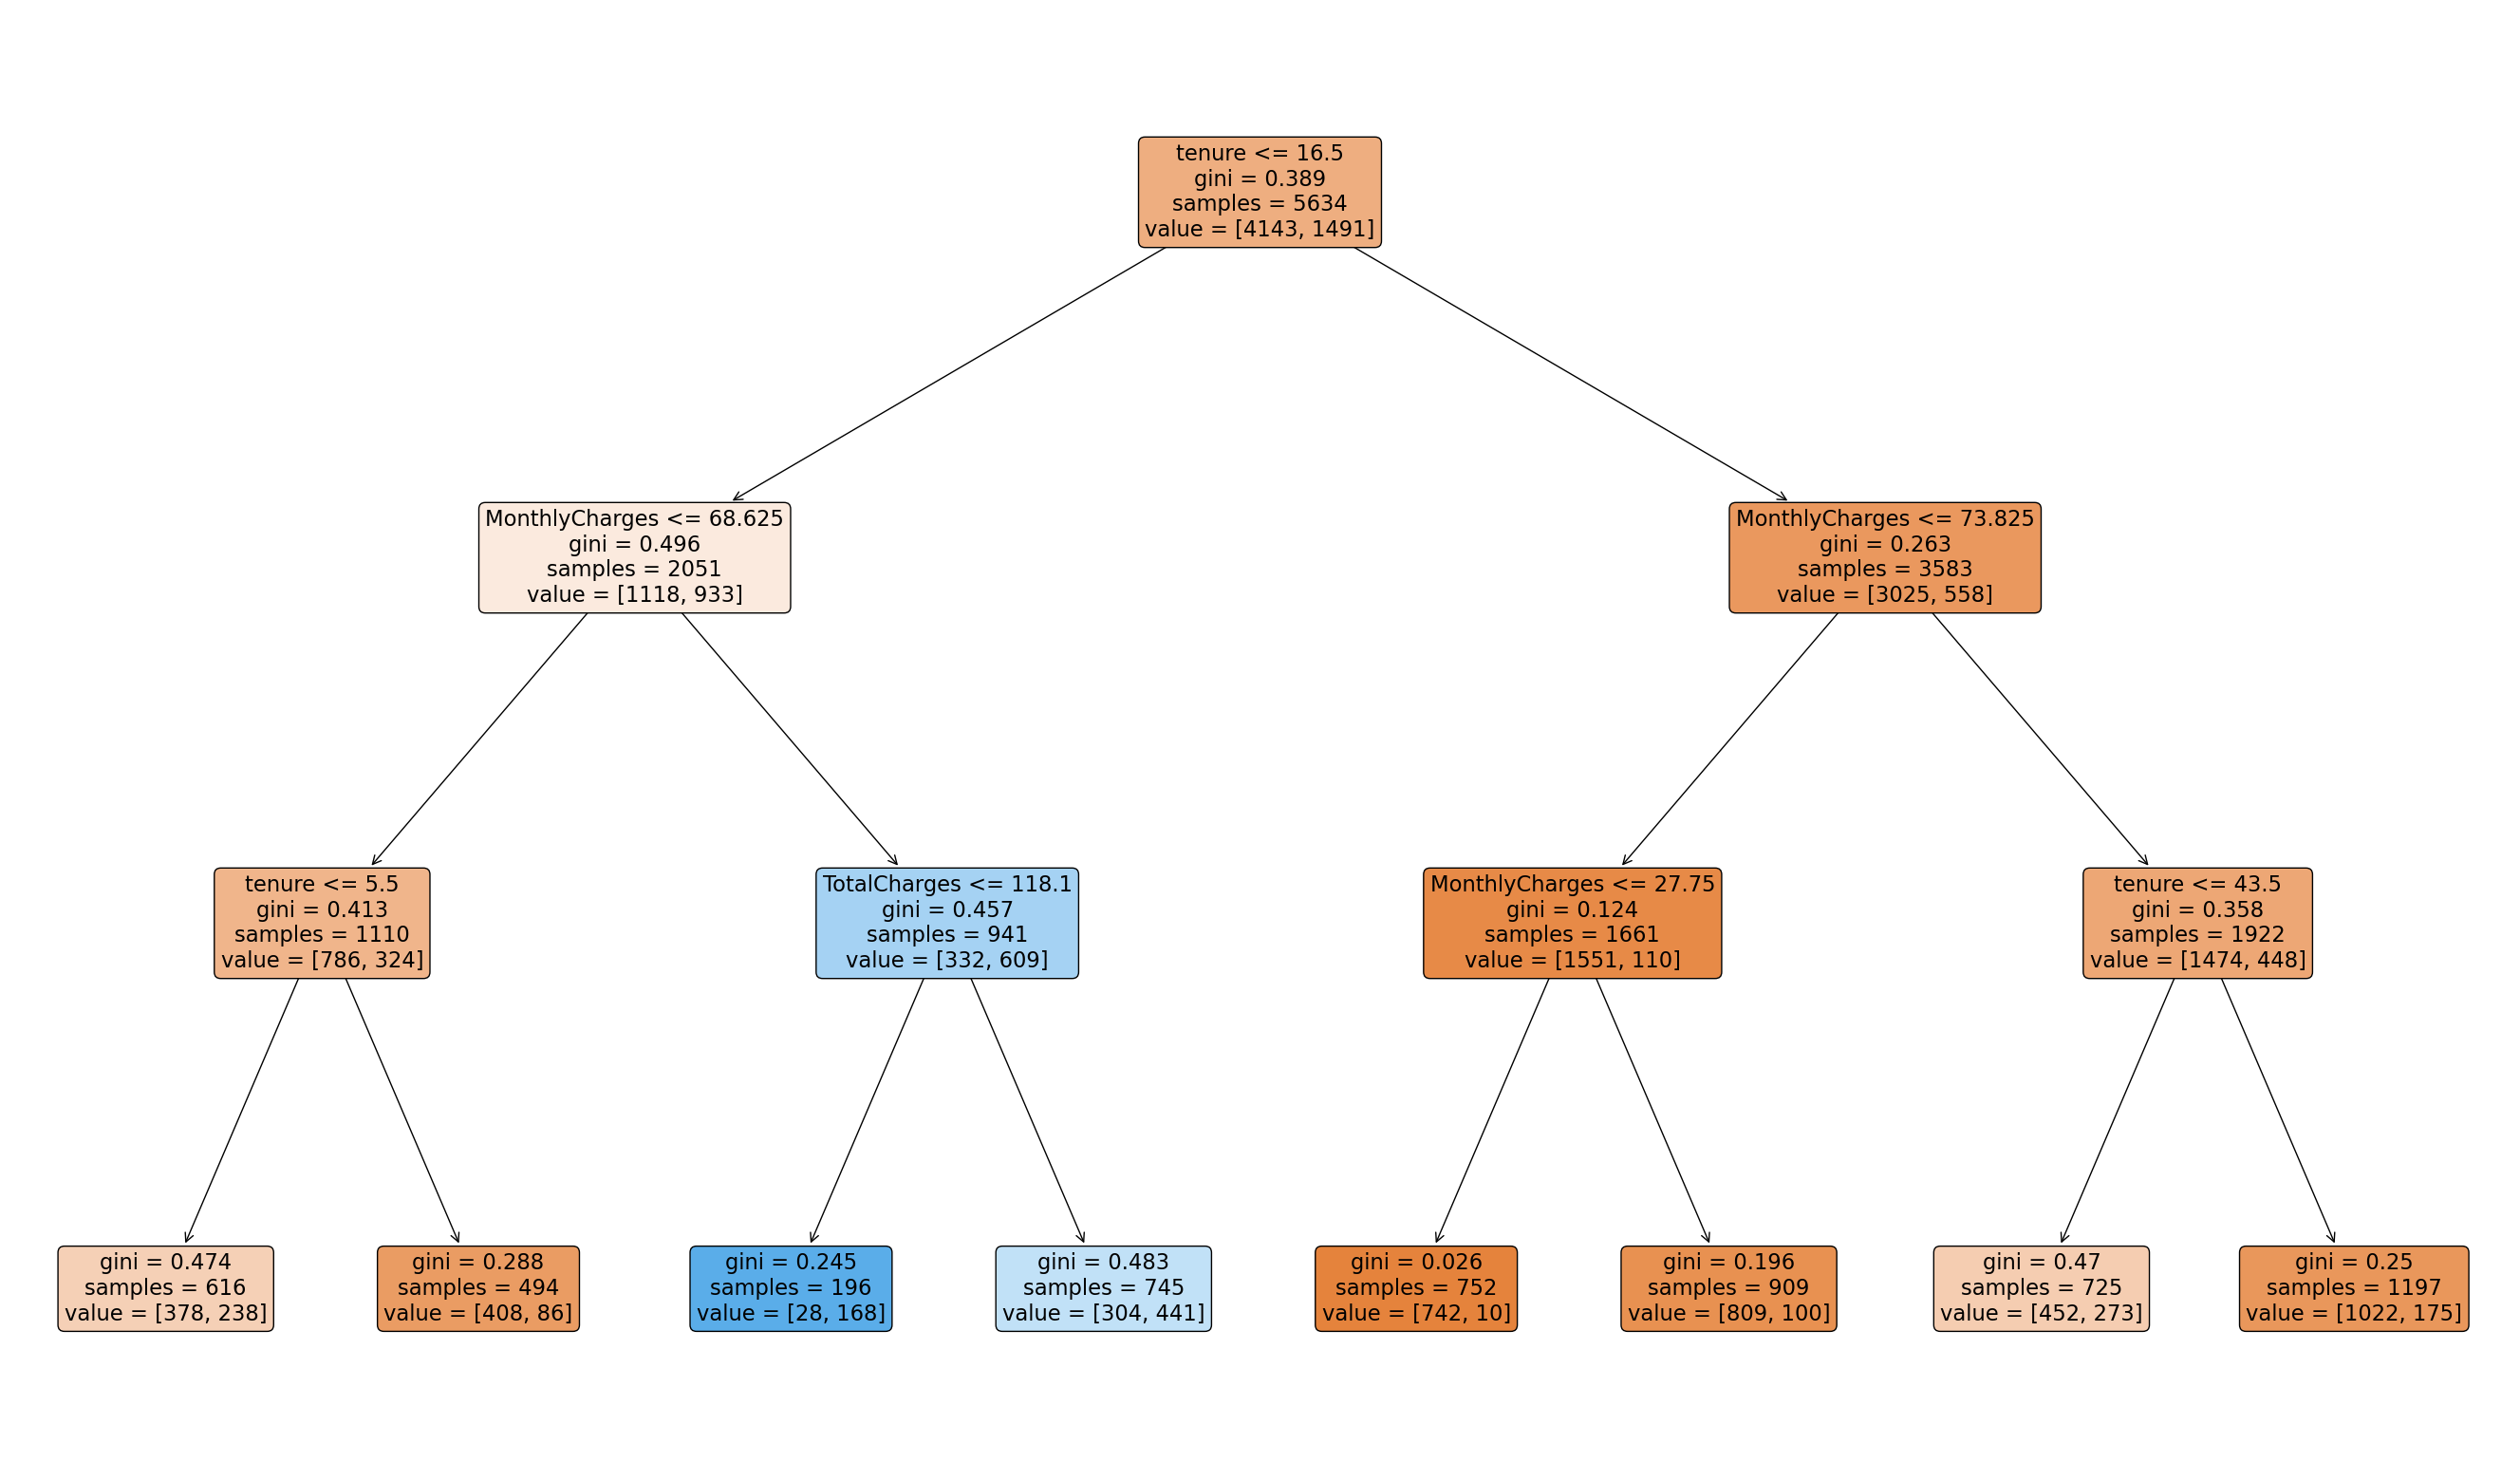

In [24]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=X.columns)
plt.show() 